In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)

In [12]:
from ffdFoil import *
from foil_eval import *

(-0.05, 1.05, -0.0660066, 0.0660066)

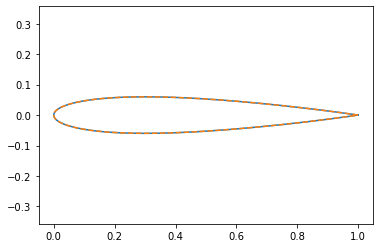

In [8]:
# Define airfoil ffd base shape and number of points
nPts = 10
naca0012_ffd = fdFoil(nPts, base='naca0012.csv', defRange=1)

fig, ax = plt.subplots()
ax.plot(naca0012_ffd.base[0,:], naca0012_ffd.base[1,:])

# Get coordinates of deformation (a deformation is defined as 10 floats between 0 and 1)
deform = np.random.rand(naca0012_ffd.nPts)*0+0.5
newCoords = naca0012_ffd.express(deform)

# View Deformed shape
ax.plot(newCoords[0,:], newCoords[1,:],'--')
ax.axis('equal')

In [13]:
# Evaluate base foil and deformed foil
print('Base: cd, cl')
print(xfoilEval(naca0012_ffd.base))

print('New: cd, cl')
print(xfoilEval(newCoords))

# Get Fitness (-log(drag)) and Descriptor (lift, area) from each
print('Base: fitness, (cl, area)')
print(evalFoil(naca0012_ffd.base))

print('New: fitness, (cl, area)')
print(evalFoil(newCoords))


Base: cd, cl
(0.00688, 0.3156)
New: cd, cl
(0.00688, 0.3156)
Base: fitness, (cl, area)
(4.979136627036885, array([0.32, 0.08]))
New: fitness, (cl, area)
(4.979136627036885, array([0.32, 0.08]))


In [18]:
np.random.seed(0)
for i in range(10):
    deform = np.random.rand(naca0012_ffd.nPts)+0.5
    newCoords = naca0012_ffd.express(deform)
    fit, behavior = evalFoil(newCoords)
    print('New: fitness, (cl, area)')
    print(evalFoil(newCoords))
    

New: fitness, (cl, area)
(3.0726133178899486, array([1.81, 0.07]))
New: fitness, (cl, area)
(nan, array([ nan, 0.07]))
New: fitness, (cl, area)
(3.406109426023176, array([1.27, 0.11]))
New: fitness, (cl, area)
(3.028048875030534, array([1.93, 0.1 ]))
New: fitness, (cl, area)
(2.8189258974481466, array([1.39, 0.11]))
New: fitness, (cl, area)
(nan, array([nan, nan]))
New: fitness, (cl, area)
(3.1444643273543904, array([1.45, 0.12]))
New: fitness, (cl, area)
(2.715376976488671, array([1.51, 0.08]))
New: fitness, (cl, area)
(3.8189881394609566, array([1.7 , 0.08]))
New: fitness, (cl, area)
(2.9265794148656745, array([2.01, 0.09]))


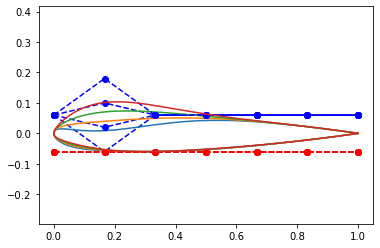

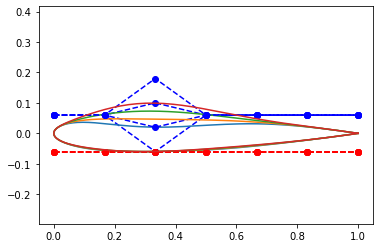

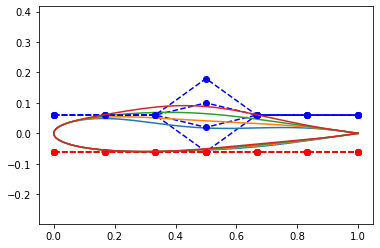

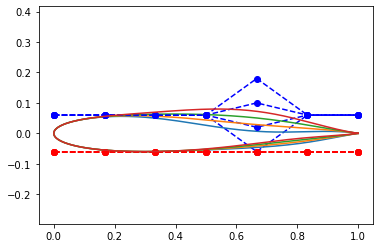

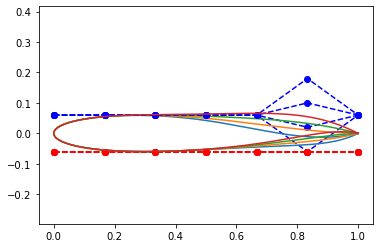

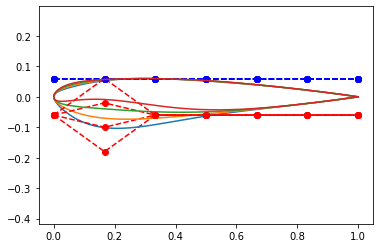

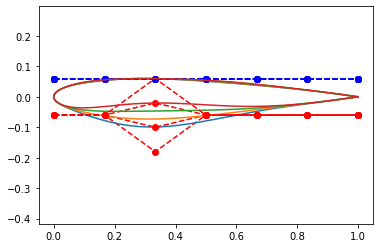

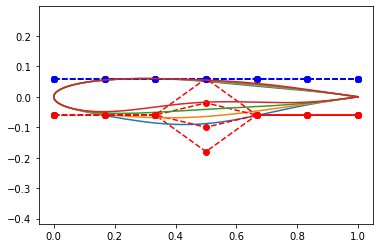

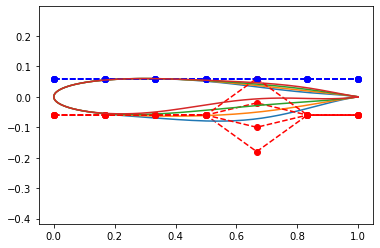

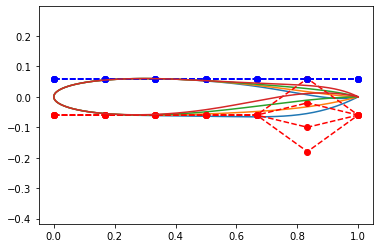

In [11]:
# View effect of each control point
foil = naca0012_ffd
for iPt in range(foil.nPts):
    deform = 0.5*np.ones(foil.nPts)
    fig, ax = plt.subplots()
    for iVal in np.linspace(0,1,4):
        deform[iPt] = iVal
        ax = naca0012_ffd.fPlot(deform, axis=ax, scale='equal') # fPlot shows pt positions too

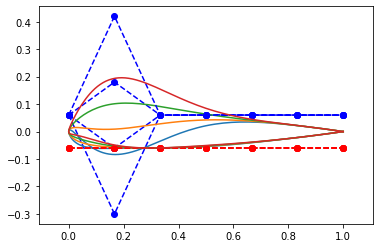

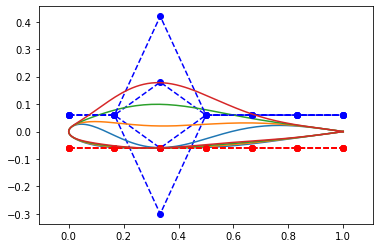

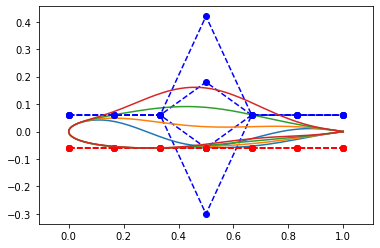

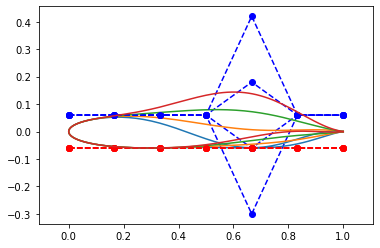

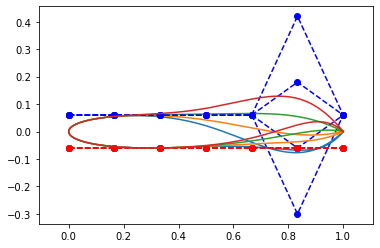

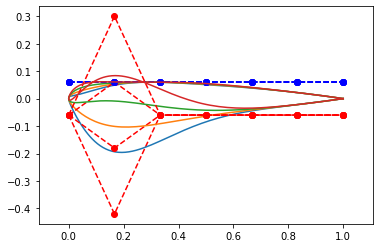

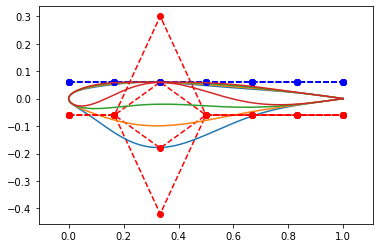

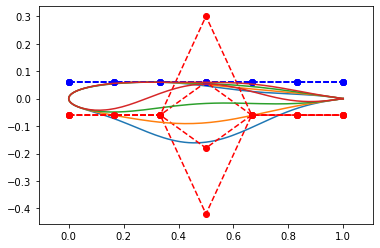

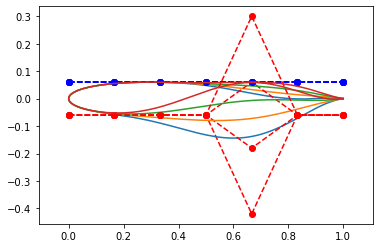

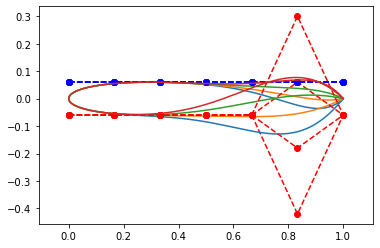

In [6]:
# View effect of each control point
naca0012_ffd2 = ffdFoil(nPts, base='naca0012.csv', defRange=3)
foil = naca0012_ffd2
for iPt in range(foil.nPts):
    deform = 0.5*np.ones(foil.nPts)
    fig, ax = plt.subplots()
    for iVal in np.linspace(0,1,4):
        deform[iPt] = iVal
        ax = naca0012_ffd2.fPlot(deform, axis=ax, scale='equal') # fPlot shows pt positions too